# WeatherPy

## Analysis

In [7]:
import pandas as pd
import json
import requests as rq
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from citipy import citipy
from pprint import pprint
import time

In [8]:
city_info = citipy.nearest_city(22.99, 120.21)
att = dir(city_info)
print(att)
city = city_info.city_name
print(city)
country = city_info.country_code
print(country)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'city_name', 'country_code']
tainan
tw


## Generate Cities List

In [9]:
weather_df = pd.DataFrame(columns= ['City','Country'])
for i in range(1000):
    lat = np.random.uniform(low= -90, high=90)
    long = np.random.uniform(low=-180, high=180)
    city_info = citipy.nearest_city(lat, long)
    city = city_info.city_name
    country = city_info.country_code
    weather_df = weather_df.append({'City':city, 'Country':country}, ignore_index=True)
    
weather_df.head()

,City,Country
0,bethel,us
1,miandoab,ir
2,ushuaia,ar
3,illoqqortoormiut,gl
4,bethel,us


## Perform API Calls

In [10]:
weather_df["Temperature (F)"] = ""
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Wind Speed (mph)"] = ""
weather_df.head()

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,bethel,us,,,,,,
1,miandoab,ir,,,,,,
2,ushuaia,ar,,,,,,
3,illoqqortoormiut,gl,,,,,,
4,bethel,us,,,,,,


In [11]:
url = 'http://api.openweathermap.org/data/2.5/weather'

print("Beginning Data Retrieval")
city_count = 0

for index, row in weather_df.iterrows():
    target_city = row["City"]
    city = target_city.replace(" ","")
    params = {'q':city, 'APPID':'23c333dd9ad6b00441baded0602a84c7', 'units':'IMPERIAL'}
    city_data = rq.get(url, params=params).json()
    
    if city_data["cod"] == "404":
        continue
    else:  
        print("------------------------")
        print("Proceesing Record : " , city_count+1, ' of Set 1' ' | ' , city_data["name"])
        print(url+"?"+"&APPID=23c333dd9ad6b00441baded0602a84c7"+"&units=IMPERIAL"+"&q="+city)
        weather_df.set_value(index, "Temperature (F)", city_data["main"]["temp"])
        weather_df.set_value(index, "Latitude", city_data["coord"]["lat"])
        weather_df.set_value(index, "Longitude", city_data["coord"]["lon"])
        weather_df.set_value(index, "Humidity (%)", city_data["main"]["humidity"])
        weather_df.set_value(index, "Cloudiness (%)", city_data["clouds"]["all"])
        weather_df.set_value(index, "Wind Speed (mph)", city_data["wind"]["speed"])
        city_count += 1
        if city_count == 500:
            break
            
print(f"Complete Data Retrieval of {city_count} cities")

Beginning Data Retrieval
------------------------
Proceesing Record :  1  of Set 1 |  Bethel
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=bethel
------------------------
Proceesing Record :  2  of Set 1 |  Miandoab
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=miandoab
------------------------
Proceesing Record :  3  of Set 1 |  Ushuaia
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=ushuaia
------------------------
Proceesing Record :  4  of Set 1 |  Bethel
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=bethel
------------------------
Proceesing Record :  5  of Set 1 |  Ilulissat
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=ilulissat
------------------------
Proceesing Record :  6  of Set 1 |  Busselt

------------------------
Proceesing Record :  46  of Set 1 |  Pochutla
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=pochutla
------------------------
Proceesing Record :  47  of Set 1 |  Hermanus
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=hermanus
------------------------
Proceesing Record :  48  of Set 1 |  Saint-Pierre
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=saint-pierre
------------------------
Proceesing Record :  49  of Set 1 |  Rikitea
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=rikitea
------------------------
Proceesing Record :  50  of Set 1 |  Baherden
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=baherden
------------------------
Proceesing Record :  51  of Set 1 |  Bredasdorp
h

------------------------
Proceesing Record :  91  of Set 1 |  Altay
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=altay
------------------------
Proceesing Record :  92  of Set 1 |  Khandbari
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=khandbari
------------------------
Proceesing Record :  93  of Set 1 |  Pevek
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=pevek
------------------------
Proceesing Record :  94  of Set 1 |  Bloemhof
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=bloemhof
------------------------
Proceesing Record :  95  of Set 1 |  Maplecreek
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=maplecreek
------------------------
Proceesing Record :  96  of Set 1 |  Katsuura
http://api.open

------------------------
Proceesing Record :  137  of Set 1 |  Galle
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=galle
------------------------
Proceesing Record :  138  of Set 1 |  Pevek
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=pevek
------------------------
Proceesing Record :  139  of Set 1 |  Hermanus
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=hermanus
------------------------
Proceesing Record :  140  of Set 1 |  Torbay
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=torbay
------------------------
Proceesing Record :  141  of Set 1 |  Chapais
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=chapais
------------------------
Proceesing Record :  142  of Set 1 |  Laguna
http://api.openweatherm

------------------------
Proceesing Record :  182  of Set 1 |  Manono
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=manono
------------------------
Proceesing Record :  183  of Set 1 |  Rikitea
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=rikitea
------------------------
Proceesing Record :  184  of Set 1 |  Yellandu
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=yellandu
------------------------
Proceesing Record :  185  of Set 1 |  Busselton
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=busselton
------------------------
Proceesing Record :  186  of Set 1 |  Hilo
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=hilo
------------------------
Proceesing Record :  187  of Set 1 |  Albany
http://api.openwe

Proceesing Record :  227  of Set 1 |  Nanortalik
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=nanortalik
------------------------
Proceesing Record :  228  of Set 1 |  Nome
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=nome
------------------------
Proceesing Record :  229  of Set 1 |  Rikitea
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=rikitea
------------------------
Proceesing Record :  230  of Set 1 |  Ishigaki
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=ishigaki
------------------------
Proceesing Record :  231  of Set 1 |  Bredasdorp
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=bredasdorp
------------------------
Proceesing Record :  232  of Set 1 |  Jamestown
http://api.openweathermap.org

------------------------
Proceesing Record :  273  of Set 1 |  Tiksi
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=tiksi
------------------------
Proceesing Record :  274  of Set 1 |  Pauini
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=pauini
------------------------
Proceesing Record :  275  of Set 1 |  Bilma
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=bilma
------------------------
Proceesing Record :  276  of Set 1 |  Marsassoum
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=marsassoum
------------------------
Proceesing Record :  277  of Set 1 |  Rikitea
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=rikitea
------------------------
Proceesing Record :  278  of Set 1 |  Albany
http://api.openweat

------------------------
Proceesing Record :  318  of Set 1 |  Salalah
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=salalah
------------------------
Proceesing Record :  319  of Set 1 |  Naze
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=naze
------------------------
Proceesing Record :  320  of Set 1 |  Anadyr
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=anadyr
------------------------
Proceesing Record :  321  of Set 1 |  Hobart
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=hobart
------------------------
Proceesing Record :  322  of Set 1 |  Rikitea
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=rikitea
------------------------
Proceesing Record :  323  of Set 1 |  Nishihara
http://api.openweather

------------------------
Proceesing Record :  363  of Set 1 |  Huarmey
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=huarmey
------------------------
Proceesing Record :  364  of Set 1 |  Mahebourg
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=mahebourg
------------------------
Proceesing Record :  365  of Set 1 |  Vaini
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=vaini
------------------------
Proceesing Record :  366  of Set 1 |  Rikitea
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=rikitea
------------------------
Proceesing Record :  367  of Set 1 |  Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=saint-philippe
------------------------
Proceesing Record :  368  of Set 1 |  Solginsk

------------------------
Proceesing Record :  408  of Set 1 |  Yellowknife
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=yellowknife
------------------------
Proceesing Record :  409  of Set 1 |  Russell
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=russell
------------------------
Proceesing Record :  410  of Set 1 |  Sept-Iles
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=sept-iles
------------------------
Proceesing Record :  411  of Set 1 |  Atuona
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=atuona
------------------------
Proceesing Record :  412  of Set 1 |  Busselton
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=busselton
------------------------
Proceesing Record :  413  of Set 1 |  Vaini
ht

Proceesing Record :  453  of Set 1 |  Ushuaia
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=ushuaia
------------------------
Proceesing Record :  454  of Set 1 |  Yellowknife
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=yellowknife
------------------------
Proceesing Record :  455  of Set 1 |  Upernavik
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=upernavik
------------------------
Proceesing Record :  456  of Set 1 |  Ostrovnoy
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=ostrovnoy
------------------------
Proceesing Record :  457  of Set 1 |  Ushuaia
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=ushuaia
------------------------
Proceesing Record :  458  of Set 1 |  Shakawe
http://api.openweatherm

------------------------
Proceesing Record :  498  of Set 1 |  Kodiak
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=kodiak
------------------------
Proceesing Record :  499  of Set 1 |  Taiyuan
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=taiyuan
------------------------
Proceesing Record :  500  of Set 1 |  Bancasi
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=bancasi
Complete Data Retrieval of 500 cities


In [14]:
weather_df.head()

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,bethel,us,32,60.79,-161.76,98,90,8.05
1,miandoab,ir,50,36.97,46.1,39,20,9.17
2,ushuaia,ar,44.6,-54.81,-68.31,81,75,3.36
3,illoqqortoormiut,gl,,,,,,
4,bethel,us,32,60.79,-161.76,98,90,8.05


In [16]:
# Export the City_Data into a csv
weather_df.to_csv('weather_data_file.csv', index_label="City_ID")

In [20]:
weather_df.replace('',np.nan, inplace=True)
clean_weather_df = weather_df.dropna(how='any')

lats = list(clean_weather_df["Latitude"])
temps = list(clean_weather_df["Temperature (F)"])
hums = list(clean_weather_df["Humidity (%)"])
clouds = list(clean_weather_df["Cloudiness (%)"])
speeds = list(clean_weather_df["Wind Speed (mph)"])

clean_weather_df = clean_weather_df.reset_index()
del clean_weather_df['index']
clean_weather_df.head()

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,bethel,us,32.0,60.79,-161.76,98.0,90.0,8.05
1,miandoab,ir,50.0,36.97,46.10,39.0,20.0,9.17
2,ushuaia,ar,44.6,-54.81,-68.31,81.0,75.0,3.36
3,bethel,us,32.0,60.79,-161.76,98.0,90.0,8.05
4,ilulissat,gl,19.4,69.22,-51.10,52.0,20.0,1.12


## Latitude vs Temperature Plot

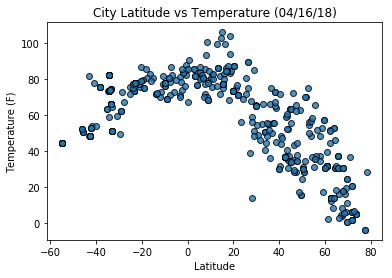

In [21]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, temps ,edgecolor="black", linewidths=1, marker="o", 
alpha=0.8,  label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

## Latitude vs Humidity Plot

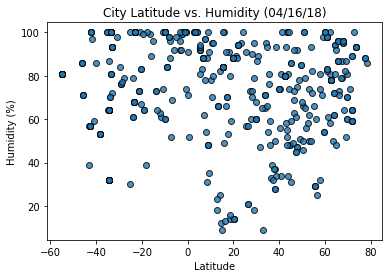

In [22]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            hums,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")


# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

## Latitude vs Cloudness Plot

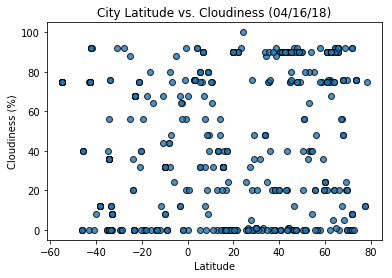

In [23]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            clouds,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")


# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

## Latitude vs Wind Speed Plot

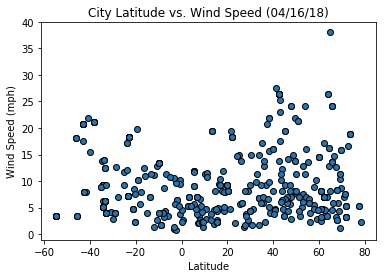

In [24]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            speeds,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=1, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()